In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

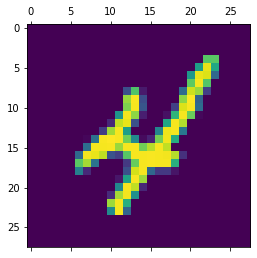

In [4]:
plt.matshow(X_train[9])

In [5]:
y_train[9]

4

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test = X_test.reshape(-1,28,28,1)

In [10]:
cnn_model=models.Sequential([
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')    
])


In [11]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

cnn_model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1644 - accuracy: 0.9527
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0559 - accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0369 - accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0269 - accuracy: 0.9913
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0198 - accuracy: 0.9933


In [12]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0461 - accuracy: 0.9850


[0.04614969342947006, 0.9850000143051147]

In [14]:
pred_2=cnn_model.predict(X_test)
pred_classes_2=[np.argmax(element) for element in pred_2]

313/313 [==============================] - 1s 4ms/step


In [15]:
print(classification_report(y_test,pred_classes_2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000

